#Group 10 : **Human Action Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
#Libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import warnings
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#Importing train data
train_data = pd.read_csv("/content/drive/MyDrive/MV_MINI_PRO/Final/Training_set_1.csv")
train_fol = glob.glob("/content/drive/MyDrive/MV_MINI_PRO/Final/Train/*")
print("\ntrain_data Contains : ")
print(train_data)
print("\ntrain_data variable data type : ")
print(train_data.dtypes)
print("\nChecking For Null Values :")
print(train_data.isnull().sum())


train_data Contains : 
            filename         label
0     Image_1000.jpg  using_laptop
1     Image_1002.jpg      sleeping
2     Image_1007.jpg  using_laptop
3     Image_1008.jpg  using_laptop
4     Image_1009.jpg      sleeping
...              ...           ...
1195   Image_990.jpg       hugging
1196   Image_992.jpg  using_laptop
1197   Image_995.jpg      drinking
1198   Image_996.jpg  using_laptop
1199   Image_999.jpg       cycling

[1200 rows x 2 columns]

train_data variable data type : 
filename    object
label       object
dtype: object

Checking For Null Values :
filename    0
label       0
dtype: int64


In [ ]:
#Train image per action count
train_data.label.value_counts()

label
using_laptop    200
sleeping        200
hugging         200
cycling         200
drinking        200
clapping        200
Name: count, dtype: int64

Total Images per class in training data as follows:


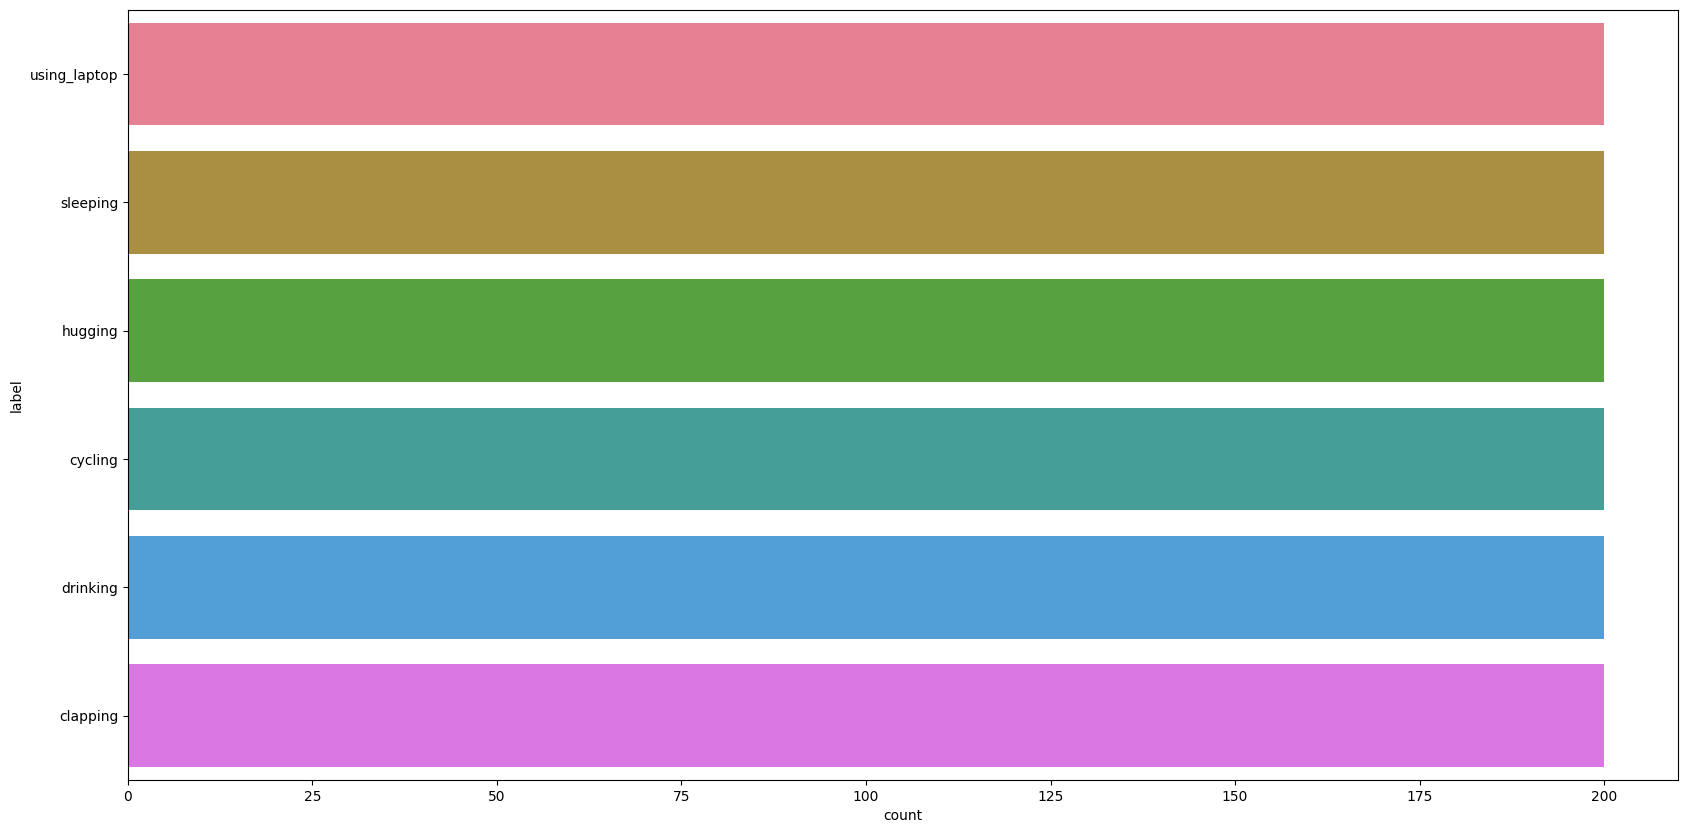

In [ ]:
#Visual Representation
warnings.filterwarnings("ignore", category=FutureWarning)
colors = sns.color_palette("husl", len(train_data.label.unique()))
print('Total Images per class in training data as follows:')
plt.figure(figsize=(20,10))
sns.countplot(train_data.label, palette=colors, legend=False)
plt.show()

In [ ]:
#Showing % Distribution of Action
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Action in training data :')
fig.show()

**Pre Processing**

In [ ]:
filename = train_data['filename']
situation = train_data['label']

img_data = []
img_label = []
length = len(train_fol)
print("Total Images in train folder : ",length)
for i in (range(len(train_fol))):
    t = '/content/drive/MyDrive/MV_MINI_PRO/Final/Train/' + filename[i]
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

Total Images in train folder :  1200


In [ ]:
img_data = np.array(img_data)
print("Checking Size Of Image in img_data : ", img_data.shape)

img_label = np.array(img_label)

Checking Size Of Image in img_data :  (1200, 160, 160, 3)


In [ ]:
act_array = list(set(img_label))
print("Total action : ",act_array)

Total action :  ['cycling', 'drinking', 'sleeping', 'clapping', 'using_laptop', 'hugging']


In [ ]:
iii = img_data
iii = np.asarray(iii)
print("The Data type of image store variable is ",type(iii))

The Data type of image store variable is  <class 'numpy.ndarray'>


Image_1969.jpg


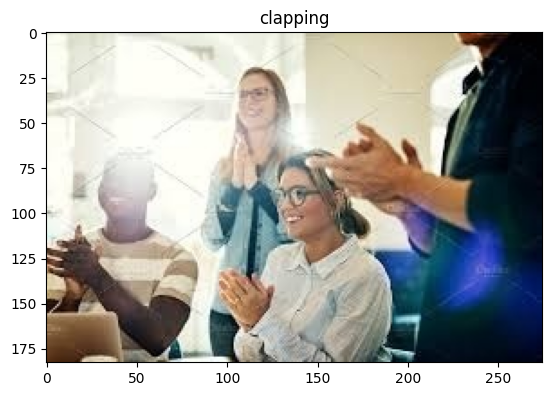

In [ ]:
def displaying_random_images():
    row_index = random.randint(1,2999)
    imgg = train_data['filename'].iloc[row_index]
    print(imgg)
    train = "/content/drive/MyDrive/MV_MINI_PRO/Final/Train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")
displaying_random_images()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(img_label)

# Convert labels to one-hot encoded format [Factorie to 0&1]
labels = to_categorical(labels, num_classes=6)

print("Total No. of labels in train image : ",len(labels))

Total No. of labels in train image :  1200


In [ ]:
#Getting Test Data
test_data = pd.read_csv("/content/drive/MyDrive/MV_MINI_PRO/Final/Testing_set_sol.csv")
test_fol = glob.glob("/content/drive/MyDrive/MV_MINI_PRO/Final/Test/*")
print("\ntest_data Contains : ")
print(test_data)
print("\ntest_data variable data type : ")
print(test_data.dtypes)
print("\nChecking For Null Values :")
print(test_data.isnull().sum())


test_data Contains : 
           filename     label
0    Image_1001.jpg  clapping
1    Image_1019.jpg  clapping
2    Image_1026.jpg  clapping
3    Image_1027.jpg  clapping
4    Image_1059.jpg  clapping
..              ...       ...
595     Image_9.jpg  clapping
596   Image_913.jpg  clapping
597   Image_927.jpg  clapping
598    Image_94.jpg  clapping
599   Image_953.jpg  clapping

[600 rows x 2 columns]

test_data variable data type : 
filename    object
label       object
dtype: object

Checking For Null Values :
filename    0
label       0
dtype: int64


Total Images per action for test data are shown below :


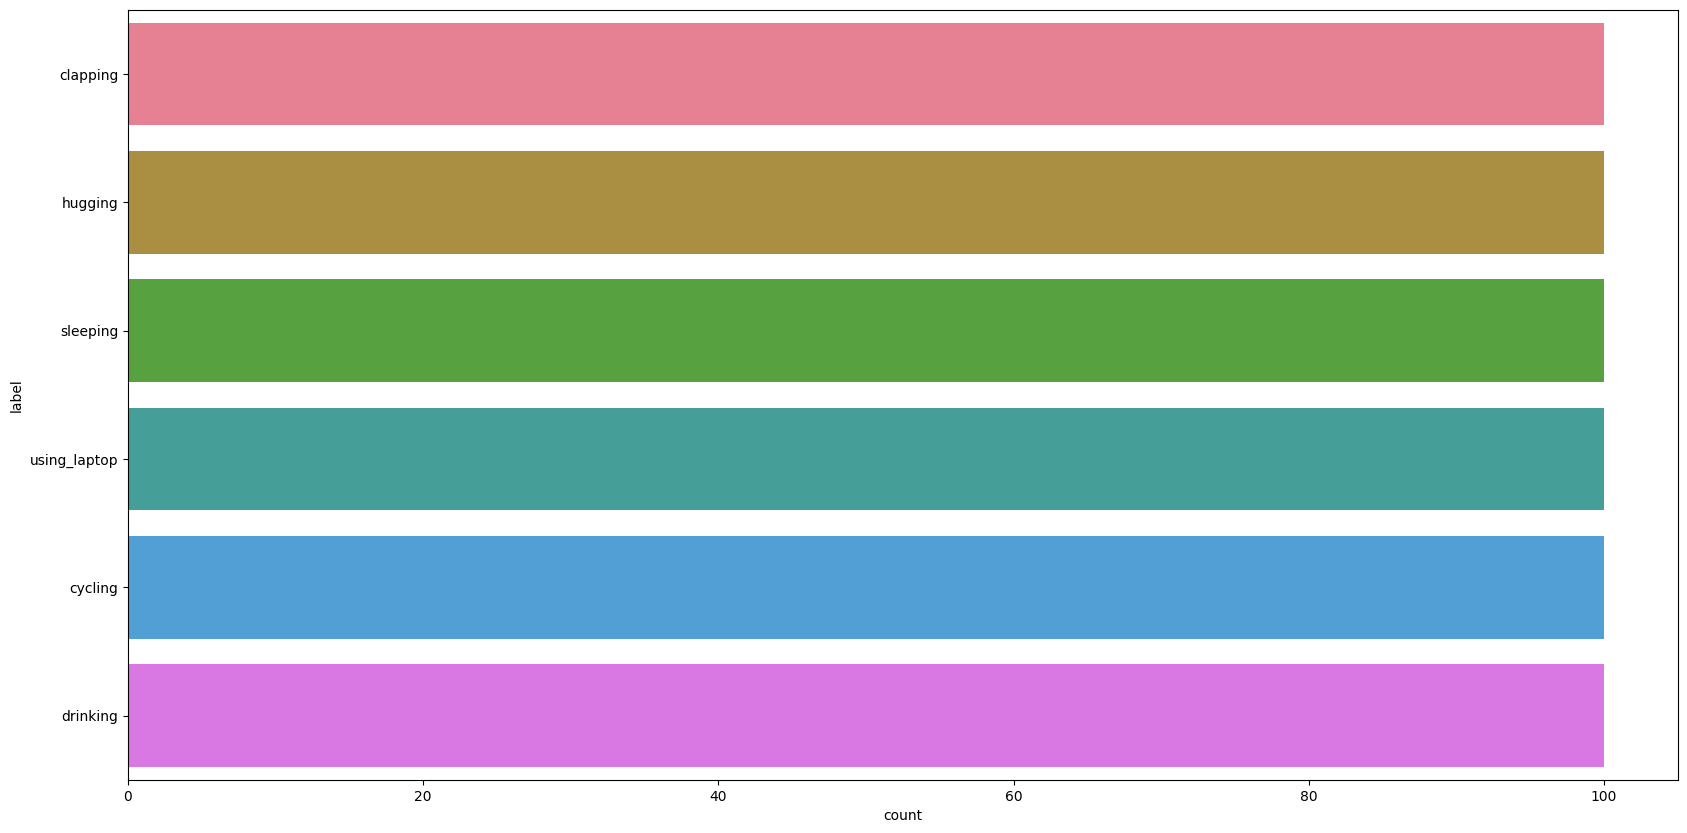

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
colors = sns.color_palette("husl", len(test_data.label.unique()))
print('Total Images per action for test data are shown below :')
plt.figure(figsize=(20,10))
sns.countplot(test_data.label, palette=colors, legend=False)
plt.show()

In [ ]:
#Showing % Distribution of Different Action
import plotly.express as px
HAR = test_data.label.value_counts()
fig = px.pie(test_data, values=HAR.values, names=HAR.index, title='Distribution of Human Action For Test Data')
fig.show()

In [ ]:
filename = test_data['filename']
situation = test_data['label']

itest_data = []
itest_label = []
length = len(test_fol)
print("Total Images in folder : ",length)
for i in range(600):
    t = '/content/drive/MyDrive/MV_MINI_PRO/Final/Test/' + filename[i]
    temp_img = Image.open(t)
    itest_data.append(np.asarray(temp_img.resize((160,160))))
    itest_label.append(situation[i])

itest = itest_data
itest = np.asarray(itest)
print("The Data type of test image store variable is ",type(itest))

Total Images in folder :  600
The Data type of test image store variable is  <class 'numpy.ndarray'>


In [ ]:
itest_label = np.array(itest_label)
label_encoder = LabelEncoder()
itest_label = label_encoder.fit_transform(itest_label)

# Convert labels to one-hot encoded format
itest_label = to_categorical(itest_label, num_classes=6)
print("Total labels in test_labels are : ",len(itest_label))

Total labels in test_labels are :  600


**1.Custom Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16

def create_custom_model(learning_rate=0.001,dropout_rate=0.2):
  custom_model = Sequential()

  custom_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
  custom_model.add(MaxPooling2D(pool_size=(2, 2)))
  custom_model.add(Dropout(dropout_rate))  # Add dropout for regularization

  custom_model.add(Conv2D(64, (3, 3), activation='relu'))
  custom_model.add(MaxPooling2D(pool_size=(2, 2)))
  custom_model.add(Dropout(dropout_rate))

  custom_model.add(Conv2D(128, (3, 3), activation='relu'))
  custom_model.add(MaxPooling2D(pool_size=(2, 2)))
  custom_model.add(Dropout(dropout_rate))

  custom_model.add(Flatten())
  custom_model.add(Dense(512, activation='relu'))
  custom_model.add(Dropout(dropout_rate))
  custom_model.add(Dense(6, activation='softmax'))

  custom_model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
  return custom_model

custom_model = create_custom_model(learning_rate=0.001,dropout_rate=0.2)

In [ ]:
#history=custom_model.fit(iii,labels, epochs=50,batch_size=32, validation_split=0.1)
history_custom = custom_model.fit(iii,labels, epochs=50,batch_size=32, validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 3s 50ms/step - loss: 231.2998 - accuracy: 0.1880 - val_loss: 1.7916 - val_accuracy: 0.1417
Epoch 2/50
34/34 [==============================] - 1s 43ms/step - loss: 1.7762 - accuracy: 0.2037 - val_loss: 1.7967 - val_accuracy: 0.1583
Epoch 3/50
34/34 [==============================] - 2s 45ms/step - loss: 1.7526 - accuracy: 0.2380 - val_loss: 1.8230 - val_accuracy: 0.1250
Epoch 4/50
34/34 [==============================] - 2s 46ms/step - loss: 1.6904 - accuracy: 0.2824 - val_loss: 1.9257 - val_accuracy: 0.1333
Epoch 5/50
34/34 [==============================] - 2s 44ms/step - loss: 1.5798 - accuracy: 0.3491 - val_loss: 2.1080 - val_accuracy: 0.1083
Epoch 6/50
34/34 [==============================] - 2s 44ms/step - loss: 1.5397 - accuracy: 0.3583 - val_loss: 2.3271 - val_accuracy: 0.1833
Epoch 7/50
34/34 [==============================] - 1s 43ms/step - loss: 1.4172 - accuracy: 0.4269 - val_loss: 2.4955 - val_accuracy: 0.1500
Epoch 8/50


19/19 - 0s - loss: 7.3040 - accuracy: 0.2750 - 188ms/epoch - 10ms/step
Custom Model Loss: 7.3040, Accuracy: 0.2750


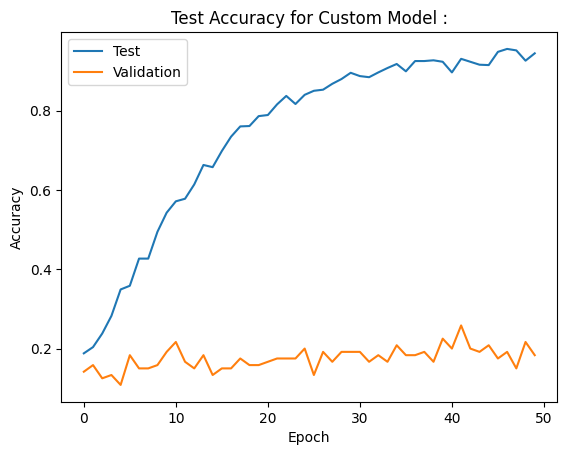

In [ ]:
#Evaluating the custom models
custom_model_loss, custom_model_accuracy = custom_model.evaluate(itest,itest_label,verbose=2)
print('Custom Model Loss: {:.4f}, Accuracy: {:.4f}'.format(custom_model_loss, custom_model_accuracy))

#Visualize Training accuracy
plt.title("Test Accuracy for Custom Model :")
plt.plot(history_custom.history['accuracy'])
plt.plot(history_custom.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
itest_data = np.array(itest_data)
#Reshape itest_data to match the expected input shape of the model
itest_data = np.reshape(itest_data, (itest_data.shape[0], 160, 160, 3))
predicted_labels1 = custom_model.predict(itest_data)

y_pred = [act_array[np.argmax(label)] for label in predicted_labels1]
y_true = [act_array[np.argmax(label)] for label in itest_label]

#Compute classification report
report_custom = classification_report(y_true, y_pred)
print("Report for Custom Model : \n", report_custom)

19/19 [==============================] - 0s 8ms/step
Report for Custom Model : 
               precision    recall  f1-score   support

    clapping       0.24      0.20      0.22       100
     cycling       0.29      0.43      0.35       100
    drinking       0.34      0.28      0.31       100
     hugging       0.28      0.23      0.25       100
    sleeping       0.22      0.30      0.26       100
using_laptop       0.29      0.21      0.24       100

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.27       600
weighted avg       0.28      0.28      0.27       600



Classification of action through Custom Model:



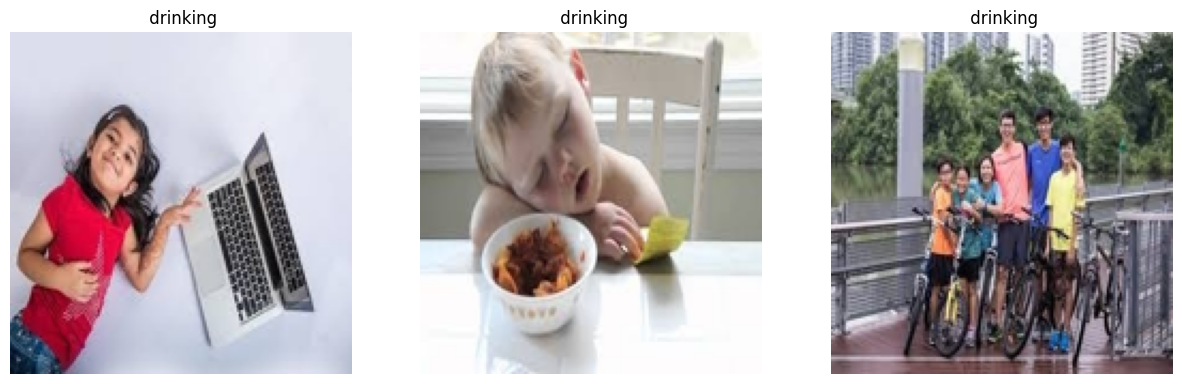

In [ ]:
print("Classification of action through Custom Model:\n")
#Selecting random images
sample_img = random.sample(range(len(itest)),3)

#Plotiing sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_img):
    plt.subplot(1, 3, i+1)
    plt.imshow(itest[idx])
    plt.title(f' {y_pred[idx]}')
    plt.axis('off')
plt.show()

**2.VGG16_Model**

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

def create_vgg16_model():
    input_layer = Input(shape=(160, 160, 3))
    vgg16_model = VGG16(include_top=False, input_tensor=input_layer, pooling='avg', weights='imagenet')

    x = Flatten()(vgg16_model.output)
    x = Dense(512, activation='relu')(x)
    output_layer = Dense(6, activation='softmax')(x)

    vgg16_model = Model(inputs=input_layer, outputs=output_layer)

    for layer in vgg16_model.layers:
        layer.trainable = False

    vgg16_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return vgg16_model

vgg16_model = create_vgg16_model()

In [ ]:
history_vgg16=vgg16_model.fit(iii,labels, epochs=50,batch_size=32, validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 3s 81ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 2/50
34/34 [==============================] - 2s 71ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 3/50
34/34 [==============================] - 2s 72ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 4/50
34/34 [==============================] - 2s 72ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 5/50
34/34 [==============================] - 2s 72ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 6/50
34/34 [==============================] - 3s 75ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 7/50
34/34 [==============================] - 2s 73ms/step - loss: 6.8463 - accuracy: 0.2093 - val_loss: 8.1207 - val_accuracy: 0.1083
Epoch 8/50
34

19/19 - 1s - loss: 6.7449 - accuracy: 0.2050 - 1s/epoch - 66ms/step
VGG16 Model Loss: 6.7449, Accuracy: 0.2050


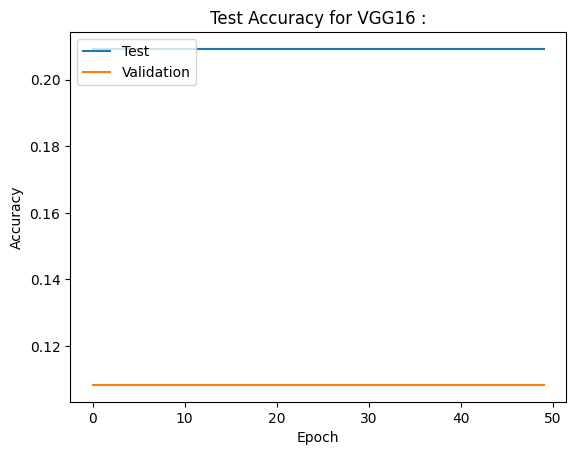

In [ ]:
#Evaluate the models here
vgg16_model_loss, vgg16_model_accuracy = vgg16_model.evaluate(itest,itest_label, verbose=2)
print('VGG16 Model Loss: {:.4f}, Accuracy: {:.4f}'.format(vgg16_model_loss, vgg16_model_accuracy))

#Visualize training accuracy
plt.title("Test Accuracy for VGG16 :")
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predicted_labels2 = vgg16_model.predict(itest_data)

y_pred2 = [act_array[np.argmax(label)] for label in predicted_labels2]
y_true2 = [act_array[np.argmax(label)] for label in itest_label]

#Compute classification report
report_vgg = classification_report(y_true2, y_pred2)
print("Report for VGG16 Model : \n",report_vgg)

19/19 [==============================] - 1s 64ms/step
Report for VGG16 Model : 
               precision    recall  f1-score   support

    clapping       0.39      0.22      0.28       100
     cycling       0.18      0.51      0.26       100
    drinking       0.21      0.03      0.05       100
     hugging       0.19      0.32      0.24       100
    sleeping       0.21      0.15      0.17       100
using_laptop       0.00      0.00      0.00       100

    accuracy                           0.20       600
   macro avg       0.20      0.20      0.17       600
weighted avg       0.20      0.20      0.17       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Classification of Action through VGG16 Model : 



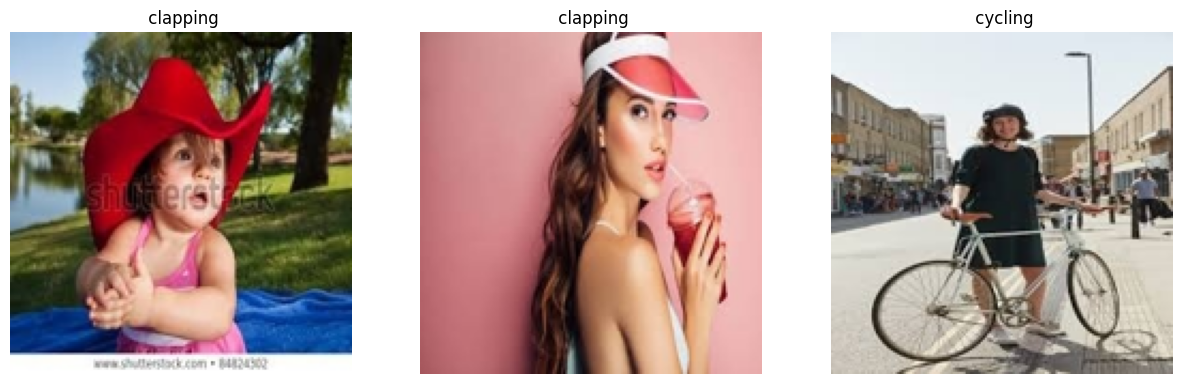

In [ ]:
print("\nClassification of Action through VGG16 Model : \n")
#Selecting random images
sample_i = random.sample(range(len(itest)),3)
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_i):
    plt.subplot(1, 3, i+1)
    plt.imshow(itest[idx])
    plt.title(f' {y_pred2[idx]}')
    plt.axis('off')
plt.show()

**3.CNN_Model**

In [ ]:
def create_efficientnet_model(learning_rate=0.001):
  efficientnet_model = Sequential()

  model = EfficientNetB7(include_top=False,
                          input_shape=(160, 160, 3),
                          pooling="avg",
                          classes=6,
                          weights="imagenet")
  for layer in model.layers:
    layer.trainable = False

  efficientnet_model.add(model)
  efficientnet_model.add(Flatten())
  efficientnet_model.add(Dense(512, activation="relu"))
  efficientnet_model.add(Dense(6, activation="softmax"))

  efficientnet_model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
  return efficientnet_model

cnn_model = create_efficientnet_model(learning_rate=0.001)

In [ ]:
history_cnn = cnn_model.fit(iii,labels, epochs=50,batch_size=32, validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 36s 378ms/step - loss: 0.7455 - accuracy: 0.7324 - val_loss: 0.5706 - val_accuracy: 0.8083
Epoch 2/50
34/34 [==============================] - 7s 209ms/step - loss: 0.2476 - accuracy: 0.9204 - val_loss: 0.6582 - val_accuracy: 0.7750
Epoch 3/50
34/34 [==============================] - 8s 223ms/step - loss: 0.1168 - accuracy: 0.9731 - val_loss: 0.6706 - val_accuracy: 0.7917
Epoch 4/50
34/34 [==============================] - 8s 229ms/step - loss: 0.0808 - accuracy: 0.9796 - val_loss: 0.6957 - val_accuracy: 0.7917
Epoch 5/50
34/34 [==============================] - 8s 225ms/step - loss: 0.0555 - accuracy: 0.9880 - val_loss: 0.7832 - val_accuracy: 0.8167
Epoch 6/50
34/34 [==============================] - 8s 227ms/step - loss: 0.0377 - accuracy: 0.9926 - val_loss: 0.7084 - val_accuracy: 0.8250
Epoch 7/50
34/34 [==============================] - 8s 230ms/step - loss: 0.0219 - accuracy: 0.9991 - val_loss: 0.6745 - val_accuracy: 0.8250
Epoch

19/19 - 4s - loss: 1.2313 - accuracy: 0.7867 - 4s/epoch - 186ms/step
CNN Model Loss: 1.2313, Accuracy: 0.7867


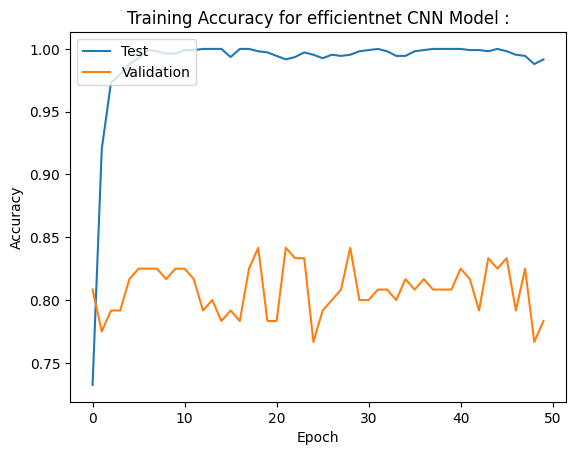

In [ ]:
# Evaluate the cnn model
cnn_model_loss, cnn_model_accuracy = cnn_model.evaluate(itest,itest_label,verbose=2)
print('CNN Model Loss: {:.4f}, Accuracy: {:.4f}'.format(cnn_model_loss, cnn_model_accuracy))

#Visualize Training accuracy
plt.title("Training Accuracy for efficientnet CNN Model :")
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predicted_labels3 = cnn_model.predict(itest_data)
y_pred3 = [act_array[np.argmax(label)] for label in predicted_labels3]
y_true3 = [act_array[np.argmax(label)] for label in itest_label]

#Compute report
report_cnn = classification_report(y_true3, y_pred3)

#Classification report
print("Report for CNN Model : \n",report_cnn)

19/19 [==============================] - 10s 184ms/step
Report for CNN Model : 
               precision    recall  f1-score   support

    clapping       0.68      0.77      0.72       100
     cycling       0.65      0.81      0.72       100
    drinking       0.98      0.96      0.97       100
     hugging       0.83      0.78      0.80       100
    sleeping       0.77      0.74      0.76       100
using_laptop       0.89      0.66      0.76       100

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



Classification of action through efficientnet CNN Model : 



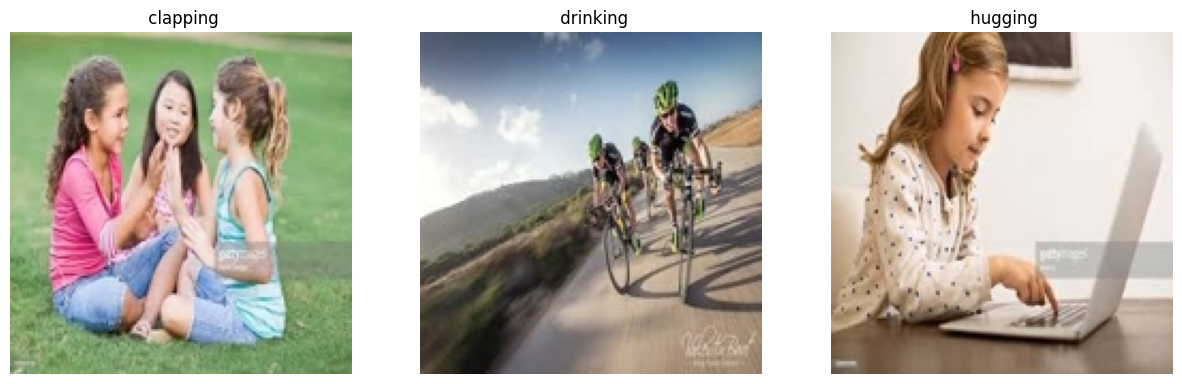

In [ ]:
print("Classification of action through efficientnet CNN Model : \n")
#random sample images
sample_i = random.sample(range(len(itest)), 3)
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_i):
    plt.subplot(1, 3, i+1)
    plt.imshow(itest[idx])
    plt.title(f' {y_pred3[idx]}')
    plt.axis('off')
plt.show()

**4.Resnet50_Model**

In [ ]:
from tensorflow.keras.applications import ResNet50
def create_resnet50_model(learning_rate=0.001):
  input_layer = Input(shape=(160, 160, 3))
  resnet50_model = ResNet50(include_top=False, input_tensor=input_layer, weights='imagenet')

  x = Flatten()(resnet50_model.output)
  x = Dense(512, activation='relu')(x)
  output_layer = Dense(6, activation='softmax')(x)

  resnet50_model = Model(inputs=input_layer, outputs=output_layer)

  for layer in resnet50_model.layers[:-1]:
    layer.trainable = False

  resnet50_model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
  return resnet50_model

resnet50_model = create_resnet50_model(learning_rate=0.001)

In [ ]:
history_resnet50 = resnet50_model.fit(iii, labels, epochs=50,batch_size=32, validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 6s 95ms/step - loss: 2.8381 - accuracy: 0.2306 - val_loss: 2.4240 - val_accuracy: 0.3417
Epoch 2/50
34/34 [==============================] - 2s 59ms/step - loss: 1.8675 - accuracy: 0.3991 - val_loss: 1.9456 - val_accuracy: 0.4250
Epoch 3/50
34/34 [==============================] - 2s 66ms/step - loss: 1.4494 - accuracy: 0.4898 - val_loss: 1.6791 - val_accuracy: 0.5000
Epoch 4/50
34/34 [==============================] - 2s 64ms/step - loss: 1.1885 - accuracy: 0.5870 - val_loss: 1.5698 - val_accuracy: 0.5167
Epoch 5/50
34/34 [==============================] - 2s 62ms/step - loss: 0.9950 - accuracy: 0.6556 - val_loss: 1.4838 - val_accuracy: 0.5167
Epoch 6/50
34/34 [==============================] - 2s 59ms/step - loss: 0.8613 - accuracy: 0.6926 - val_loss: 1.4478 - val_accuracy: 0.5333
Epoch 7/50
34/34 [==============================] - 2s 59ms/step - loss: 0.7660 - accuracy: 0.7324 - val_loss: 1.3892 - val_accuracy: 0.5417
Epoch 8/50
34

19/19 - 1s - loss: 1.5484 - accuracy: 0.5933 - 1s/epoch - 55ms/step
Resnet50 Model Loss: 1.5484, Accuracy: 0.5933


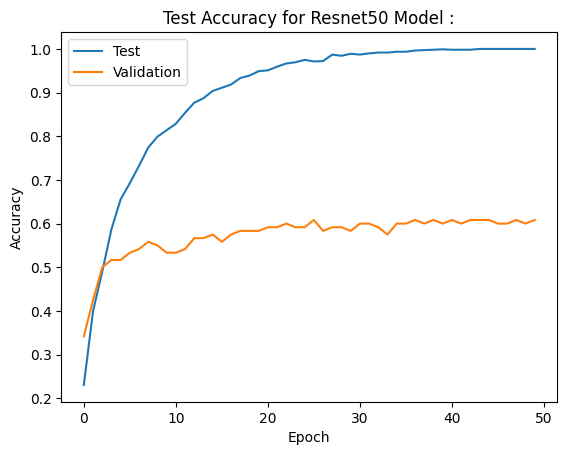

In [ ]:
# Evaluate the models here
resnet50_model_loss, resnet50_model_accuracy = resnet50_model.evaluate(itest,itest_label,verbose=2)
print('Resnet50 Model Loss: {:.4f}, Accuracy: {:.4f}'.format(resnet50_model_loss, resnet50_model_accuracy))

#Visualize Training accuracy
plt.title("Test Accuracy for Resnet50 Model :")
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predicted_labels4 = resnet50_model.predict(itest_data)

y_pred4 = [act_array[np.argmax(label)] for label in predicted_labels4]
y_true4 = [act_array[np.argmax(label)] for label in itest_label]

#Compute report
report_resnet50 = classification_report(y_true4, y_pred4)

#Classification report
print("Report for resnet50 Model : \n",report_resnet50)

19/19 [==============================] - 3s 51ms/step
Report for resnet50 Model : 
               precision    recall  f1-score   support

    clapping       0.52      0.62      0.57       100
     cycling       0.52      0.58      0.55       100
    drinking       0.95      0.84      0.89       100
     hugging       0.50      0.51      0.50       100
    sleeping       0.46      0.46      0.46       100
using_laptop       0.69      0.55      0.61       100

    accuracy                           0.59       600
   macro avg       0.61      0.59      0.60       600
weighted avg       0.61      0.59      0.60       600



Classification of action through resnet50 Model : 



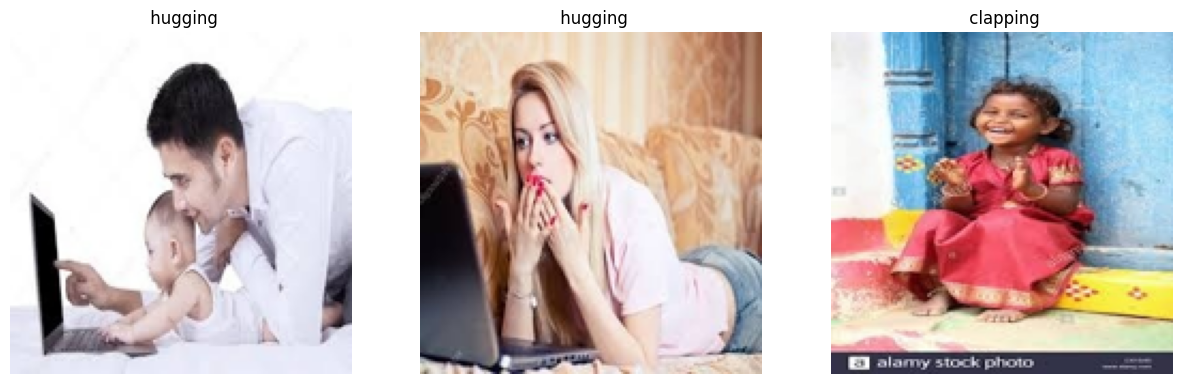

In [ ]:
print("Classification of action through resnet50 Model : \n")
#random sample images
sample_i = random.sample(range(len(itest)), 3)
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_i):
    plt.subplot(1, 3, i+1)
    plt.imshow(itest[idx])
    plt.title(f' {y_pred4[idx]}')
    plt.axis('off')
plt.show()

**5.Densenet_Model**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, AveragePooling2D, Conv2D, concatenate
from tensorflow.keras import Model

def create_densenet_model(learning_rate=0.001):
  growth_rate = 16  # You can adjust this hyperparameter
  num_dense_blocks = 4  # You can adjust this hyperparameter

  def create_dense_block(inputs, num_convs):
    out = inputs
    for _ in range(num_convs):
      inner_layer = Conv2D(growth_rate, (3, 3), padding='same', activation='relu')(out)
      inner_layer = BatchNormalization()(inner_layer)
      out = concatenate([out, inner_layer])
    return out

  inputs = Input(shape=(160, 160, 3))
  x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = Dropout(0.2)(x)

  for _ in range(num_dense_blocks):
    x = create_dense_block(x, 4)  # You can adjust the number of convolutions in the block
    x = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(0.3)(x)

  x = x[:, 0, 0, :]
  x = Dense(units=1024, activation='relu')(x)
  x = Dropout(0.5)(x)
  outputs = Dense(6, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

dense_model = create_densenet_model(learning_rate=0.001)

In [ ]:
history_dense = dense_model.fit(iii,labels, epochs=50,batch_size=32, validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 12s 61ms/step - loss: 1.9280 - accuracy: 0.2546 - val_loss: 8.8700 - val_accuracy: 0.1833
Epoch 2/50
34/34 [==============================] - 2s 45ms/step - loss: 1.8094 - accuracy: 0.2926 - val_loss: 7.7739 - val_accuracy: 0.0167
Epoch 3/50
34/34 [==============================] - 2s 45ms/step - loss: 1.7294 - accuracy: 0.3213 - val_loss: 3.4690 - val_accuracy: 0.0833
Epoch 4/50
34/34 [==============================] - 2s 44ms/step - loss: 1.6763 - accuracy: 0.3343 - val_loss: 9.2026 - val_accuracy: 0.1667
Epoch 5/50
34/34 [==============================] - 2s 46ms/step - loss: 1.5875 - accuracy: 0.3537 - val_loss: 2.6328 - val_accuracy: 0.2250
Epoch 6/50
34/34 [==============================] - 2s 53ms/step - loss: 1.4937 - accuracy: 0.4093 - val_loss: 2.8585 - val_accuracy: 0.1750
Epoch 7/50
34/34 [==============================] - 2s 53ms/step - loss: 1.4447 - accuracy: 0.4065 - val_loss: 2.6550 - val_accuracy: 0.1833
Epoch 8/50
3

19/19 - 0s - loss: 2.8091 - accuracy: 0.4300 - 213ms/epoch - 11ms/step
Dense Model Loss: 2.8091, Accuracy: 0.4300


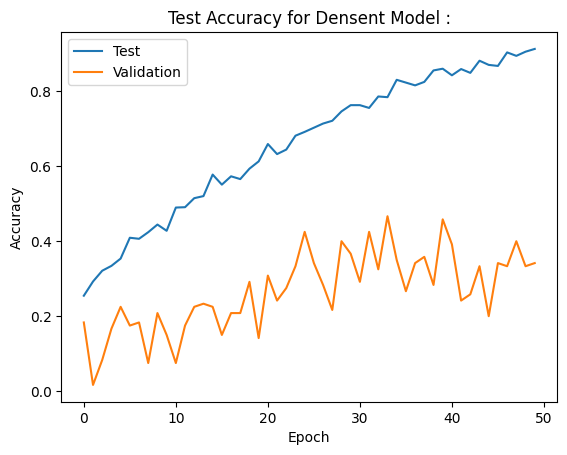

In [ ]:
# Evaluate the dense model
dense_model_loss, dense_model_accuracy = dense_model.evaluate(itest,itest_label,verbose=2)
print('Dense Model Loss: {:.4f}, Accuracy: {:.4f}'.format(dense_model_loss, dense_model_accuracy))

#Visualize Training accuracy
plt.title("Test Accuracy for Densent Model :")
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predicted_labels5 = dense_model.predict(itest_data)

y_pred5 = [act_array[np.argmax(label)] for label in predicted_labels5]
y_true5 = [act_array[np.argmax(label)] for label in itest_label]

#Compute report
report_dense = classification_report(y_true5, y_pred5)

#Classification report
print("Report for Densent Model : \n",report_dense)

19/19 [==============================] - 1s 10ms/step
Report for Densent Model : 
               precision    recall  f1-score   support

    clapping       0.33      0.46      0.39       100
     cycling       0.48      0.47      0.47       100
    drinking       0.95      0.52      0.67       100
     hugging       0.52      0.27      0.36       100
    sleeping       0.29      0.42      0.34       100
using_laptop       0.40      0.44      0.42       100

    accuracy                           0.43       600
   macro avg       0.49      0.43      0.44       600
weighted avg       0.49      0.43      0.44       600



Classification of action through Dense Model : 



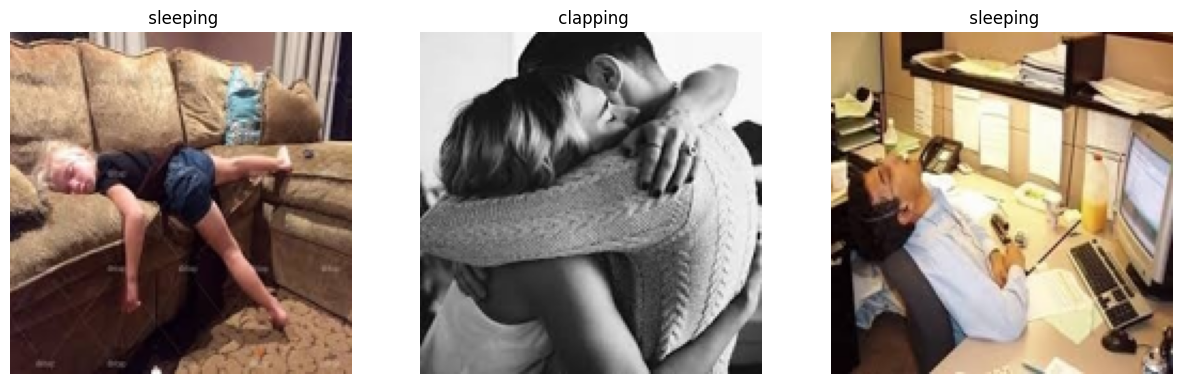

In [ ]:
print("Classification of action through Dense Model : \n")
#random sample images
sample_i = random.sample(range(len(itest)), 3)
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_i):
    plt.subplot(1, 3, i+1)
    plt.imshow(itest[idx])
    plt.title(f' {y_pred5[idx]}')
    plt.axis('off')
plt.show()

## Comparing All Model :

In [ ]:
print("1. Custom_Model Accuracy is : {:.2f} %".format(custom_model_accuracy*100))
print("2. VGG16_Model Accuracy is : {:.2f} %".format(vgg16_model_accuracy*100))
print("3. CNN_Model Accuracy is : {:.2f} %".format(cnn_model_accuracy*100))
print("4. Resnet50_Model Accuracy is : {:.2f} %".format(resnet50_model_accuracy*100))
print("5. Densent_Model Accuracy is : {:.2f} %".format(dense_model_accuracy*100))
print("\nCustom Model Report is : \n\n",report_custom)
print("\nVGG16 Model Report is : \n\n",report_vgg)
print("\nCNN Model Report is : \n\n",report_cnn)
print("\nResnet50 Model Report is : \n\n",report_resnet50)
print("\nDensent Model Report is : \n\n",report_dense)

1. Custom_Model Accuracy is : 27.50 %
2. VGG16_Model Accuracy is : 20.50 %
3. CNN_Model Accuracy is : 82.33 %
4. Resnet50_Model Accuracy is : 59.33 %
5. Densent_Model Accuracy is : 43.00 %

Custom Model Report is : 

               precision    recall  f1-score   support

    clapping       0.24      0.20      0.22       100
     cycling       0.29      0.43      0.35       100
    drinking       0.34      0.28      0.31       100
     hugging       0.28      0.23      0.25       100
    sleeping       0.22      0.30      0.26       100
using_laptop       0.29      0.21      0.24       100

    accuracy                           0.28       600
   macro avg       0.28      0.28      0.27       600
weighted avg       0.28      0.28      0.27       600


VGG16 Model Report is : 

               precision    recall  f1-score   support

    clapping       0.39      0.22      0.28       100
     cycling       0.18      0.51      0.26       100
    drinking       0.21      0.03      0.05     

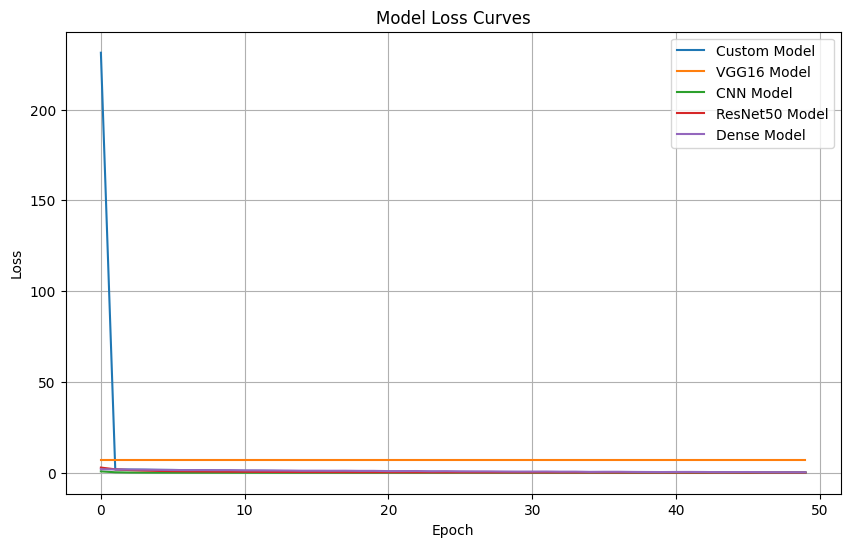

In [ ]:
# Include libraries like matplotlib
import matplotlib.pyplot as plt

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.title("Model Loss Curves")
plt.plot(history_custom.history['loss'], label='Custom Model')
plt.plot(history_vgg16.history['loss'], label='VGG16 Model')
plt.plot(history_cnn.history['loss'], label='CNN Model')
plt.plot(history_resnet50.history['loss'], label='ResNet50 Model')
plt.plot(history_dense.history['loss'], label='Dense Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

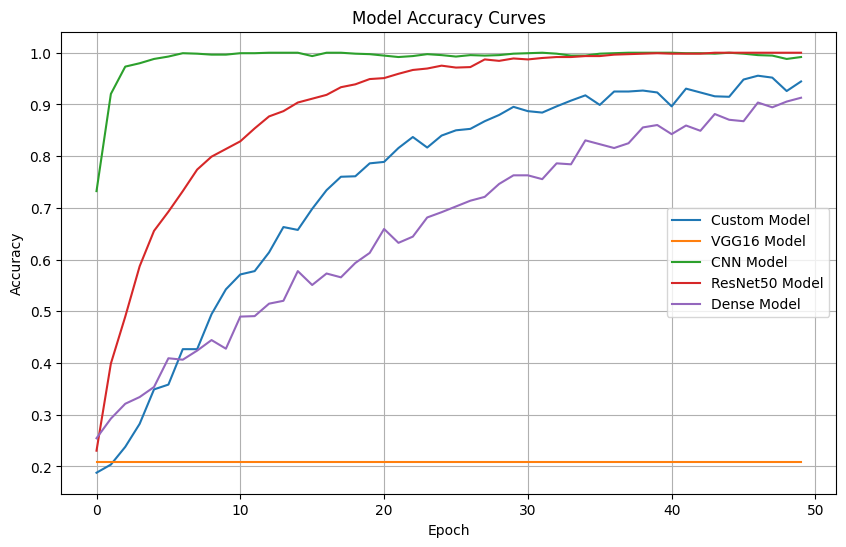

In [ ]:
# Plot accuracy curves
plt.figure(figsize=(10, 6))
plt.title("Model Accuracy Curves")
plt.plot(history_custom.history['accuracy'], label='Custom Model')
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Model')
plt.plot(history_cnn.history['accuracy'], label='CNN Model')
plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Model')
plt.plot(history_dense.history['accuracy'], label='Dense Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()